In [46]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [47]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x,start_dim=-2))
])

dataset = datasets.MNIST('./data',transform=transform,download=True)

n, w, h = dataset.data.shape

images = dataset.data.detach().numpy().reshape(-1,28*28)
labels = dataset.targets.detach().numpy()

In [48]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(images)

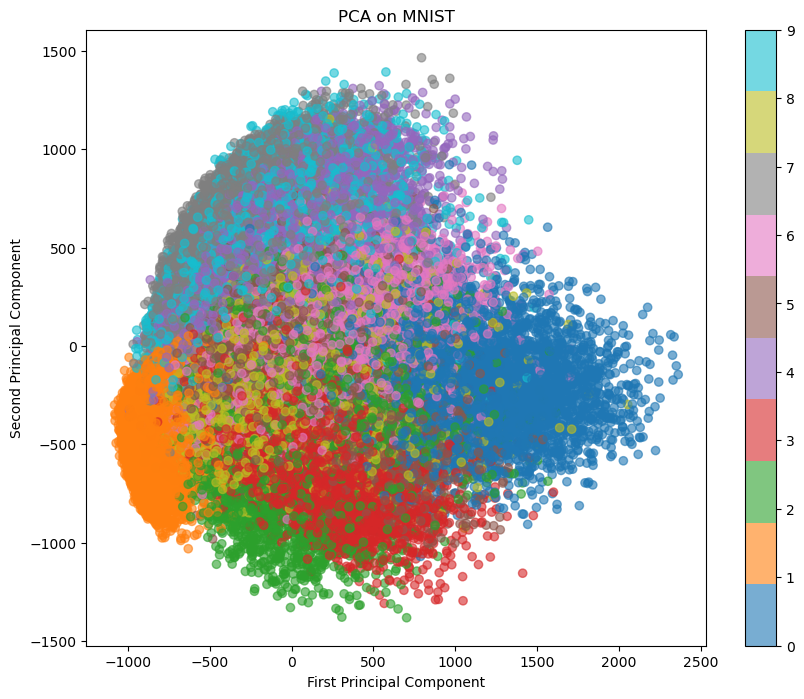

In [49]:
# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels.astype(int), cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title('PCA on MNIST')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [50]:
# Reconstruction
X_reconstructed = pca.inverse_transform(X_pca)

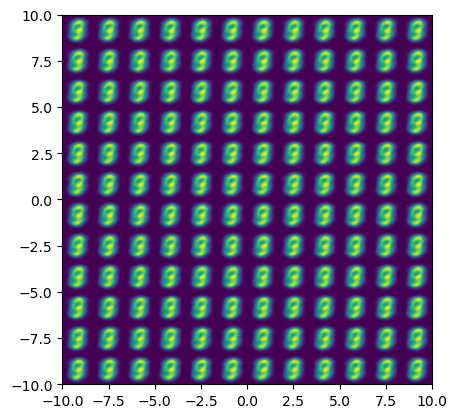

In [51]:
r0=(-10, 10)
r1=(-10, 10)
n=12

img = np.zeros((n*w, n*h))

for i, y in enumerate(np.linspace(*r1, n)):
    for j, x in enumerate(np.linspace(*r0, n)):
        # find the data point closest to the current grid point in the latent space
        z = np.array([x, y])
        idx = np.argmin(np.sum((X_pca - z)**2, axis=1))
        # reconstruct the closest data point
        x_hat = pca.inverse_transform(X_pca[idx].reshape(1, -1))
        img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat.reshape(28, 28)
plt.imshow(img, extent=[*r0, *r1])


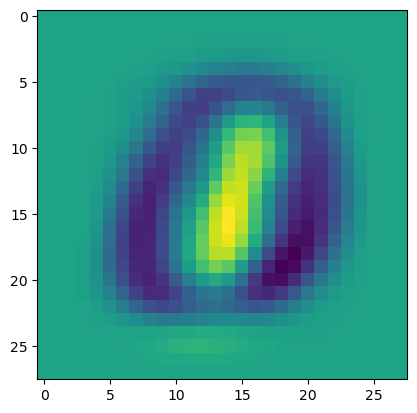

In [74]:
# generate new images
n = 1
x_new = np.random.randn(n, 784)
alpha = np.dot((x_new - pca.mean_), pca.components_.T)
variance = np.sum(alpha * pca.explained_variance_**0.5 * pca.components_.T, axis=1)
x_new_reconstructed = pca.mean_ + variance
plt.imshow(x_new_reconstructed.reshape(28, 28))